In [ ]:

from ISLP import load_data

from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
Smarket = load_data('Smarket')

#guardar en csv los datos
Smarket.to_csv('Smarket.csv', index=False)

In [14]:
predictors = ['Lag1', 'Lag2']
X = Smarket[predictors]
y = Smarket['Direction']
train = (Smarket['Year'] < 2005) # Guardo true en todos los datos anteriores a 2005

X_train = X.loc[train]
y_train = y.loc[train]
X_test = X.loc[~train]
y_test = y.loc[~train]

# tamaño de los datos
print(f"Entrenamiento: {X_train.shape[0]} observaciones")
print(f"Test: {X_test.shape[0]} observaciones")

Entrenamiento: 998 observaciones
Test: 252 observaciones


In [15]:
from sklearn.linear_model import LogisticRegression

glm = LogisticRegression()
glm.fit(X_train, y_train)


glm_pred = glm.predict(X_test)


acc = accuracy_score(y_test, glm_pred)
cm = confusion_matrix(y_test, glm_pred)

print("\nRegresión Logística")
print(f"Accuracy: {acc:.4f}")
print("\nMatriz de Confusión:")
print(pd.DataFrame(cm, 
                   index=['Real Down', 'Real Up'], 
                   columns=['Pred Down', 'Pred Up']))


Regresión Logística
Accuracy: 0.5595

Matriz de Confusión:
           Pred Down  Pred Up
Real Down         35       76
Real Up           35      106


In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # Mismos datos de entrenamiento y test

lda_pred = lda.predict(X_test)

acc_lda = accuracy_score(y_test, lda_pred)
cm_lda = confusion_matrix(y_test, lda_pred)

print("LDA")
print(f"Accuracy: {acc_lda:.4f}")

print("\nMatriz de Confusión:")
print(pd.DataFrame(cm_lda, 
                   index=['Real Down', 'Real Up'], 
                   columns=['Pred Down', 'Pred Up']))


print("\nProcentaje de veces que aparece cada clase")
# Muestra qué tan frecuente es cada clase en el entrenamiento
print(pd.Series(lda.priors_, index=lda.classes_))

print("\nMedias de grupo")
# Muestra el valor promedio de Lag1 y Lag2 cuando el mercado baja vs cuando sube
print(pd.DataFrame(lda.means_, index=lda.classes_, columns=['Lag1', 'Lag2']))

LDA
Accuracy: 0.5595

Matriz de Confusión:
           Pred Down  Pred Up
Real Down         35       76
Real Up           35      106

Procentaje de veces que aparece cada clase
Down    0.491984
Up      0.508016
dtype: float64

Medias de grupo
          Lag1      Lag2
Down  0.042790  0.033894
Up   -0.039546 -0.031325


In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # Mismos datos de entrenamiento y test

qda_pred = qda.predict(X_test)

acc_qda = accuracy_score(y_test, qda_pred)
cm_qda = confusion_matrix(y_test, qda_pred)

print("QDA")
print(f"Accuracy: {acc_qda:.4f}")

print("\nMatriz de Confusión:")
print(pd.DataFrame(cm_qda, 
                   index=['Real Down', 'Real Up'], 
                   columns=['Pred Down', 'Pred Up']))

print("\nProcentaje de veces que aparece cada clase:")
print(pd.Series(qda.priors_, index=qda.classes_))

print("\nMedias de grupo:")
print(pd.DataFrame(qda.means_, index=qda.classes_, columns=['Lag1', 'Lag2']))



QDA
Accuracy: 0.5992

Matriz de Confusión:
           Pred Down  Pred Up
Real Down         30       81
Real Up           20      121

Procentaje de veces que aparece cada clase:
Down    0.491984
Up      0.508016
dtype: float64

Medias de grupo:
          Lag1      Lag2
Down  0.042790  0.033894
Up   -0.039546 -0.031325


In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Caso K = 1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
pred_k1 = knn1.predict(X_test)

print("KNN (K=1)")
print(f"Accuracy: {accuracy_score(y_test, pred_k1):.4f}")
print("Matriz de Confusión:")
print(pd.DataFrame(confusion_matrix(y_test, pred_k1), 
                   index=['Real Down', 'Real Up'], 
                   columns=['Pred Down', 'Pred Up']))

# Caso K = 3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
pred_k3 = knn3.predict(X_test)

print("\nKNN (K=3)")
print(f"Accuracy: {accuracy_score(y_test, pred_k3):.4f}")
print("Matriz de Confusión:")
print(pd.DataFrame(confusion_matrix(y_test, pred_k3), 
                   index=['Real Down', 'Real Up'], 
                   columns=['Pred Down', 'Pred Up']))

KNN (K=1)
Accuracy: 0.5000
Matriz de Confusión:
           Pred Down  Pred Up
Real Down         43       68
Real Up           58       83

KNN (K=3)
Accuracy: 0.5317
Matriz de Confusión:
           Pred Down  Pred Up
Real Down         48       63
Real Up           55       86


In [17]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

acc_nb = accuracy_score(y_test, nb_pred)
cm_nb = confusion_matrix(y_test, nb_pred)

print("Naive Bayes")
print(f"Accuracy: {acc_nb:.4f}")
print("Matriz de Confusión:")
print(pd.DataFrame(cm_nb, 
                   index=['Real Down', 'Real Up'], 
                   columns=['Pred Down', 'Pred Up']))

Naive Bayes
Accuracy: 0.5952
Matriz de Confusión:
           Pred Down  Pred Up
Real Down         29       82
Real Up           20      121


Resultados AUC por modelo
Reg. Logística: 0.5582
LDA: 0.5584
QDA: 0.5620
Naive Bayes: 0.5627
KNN (K=3): 0.5294


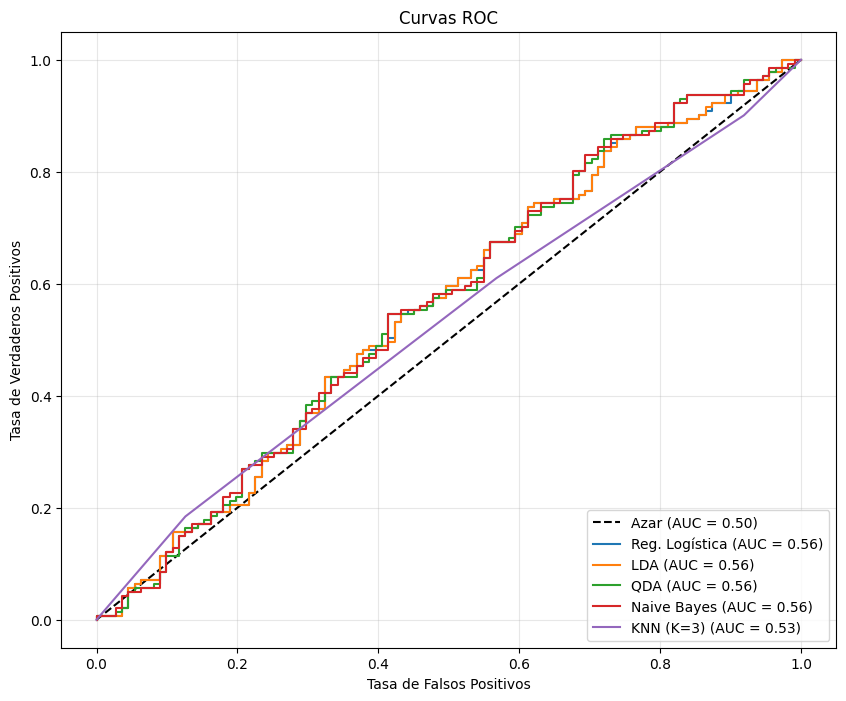

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Mapeo Down=0, Up=1
y_test_bin = y_test.map({'Down': 0, 'Up': 1})

# Lista de modelos entrenados para iterar
modelos = {
    'Reg. Logística': glm,
    'LDA': lda,
    'QDA': qda,
    'Naive Bayes': nb,
    'KNN (K=3)': knn3
}


plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Azar (AUC = 0.50)')

print("Resultados AUC por modelo")
for nombre, modelo in modelos.items():
    probs = modelo.predict_proba(X_test)[:, 1]

    auc_val = roc_auc_score(y_test_bin, probs)
    print(f"{nombre}: {auc_val:.4f}")
    
    fpr, tpr, _ = roc_curve(y_test_bin, probs)
    
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {auc_val:.2f})')


plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

Todos los modelos dieron resultados cercanos al 0.50 o 0.56 (donde 0.50 representa aleatoriedad pura). Esto confirma que predecir si el mercado subirá o bajará mañana basándose únicamente en los retornos de ayer y anteayer es complicado.

Naive Bayes y QDA fueron los mejores (AUC de 0.56). Esto nos dice que la relación entre el pasado y el futuro en estos datos no es una línea recta. Estos modelos, que permiten formas curvas (QDA) o asumen que los días son independientes (Naive Bayes), lograron captar mejor las pequeñas señales del mercado que los modelos lineales (LDA o Regresión Logística).

KNN fue el peor (AUC de 0.52), casi igual al azar. KNN intenta predecir buscando días idénticos en el pasado. Como el mercado tiene mucho "ruido", KNN se confundió fácilmente. Esto indica que buscar vecinos exactos no funciona tan bien como buscar tendencias generales estadísticas.
